In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

## Stochastic Gradient Updates

In [2]:
def f(x1, x2): # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2): # Gradient of the objective function
    return 2 * x1, 4 * x2

In [3]:
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: -0.222950, x2: -0.270904


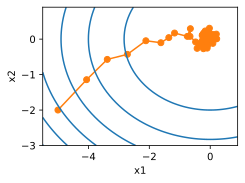

In [4]:
def constant_lr():
    return 1

eta = 0.1
lr = constant_lr # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## Dynamic Learning Rate

epoch 1000, x1: -0.742619, x2: -0.047577


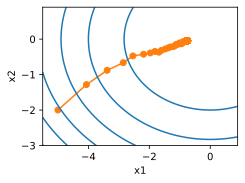

In [5]:
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.073731, x2: -0.077489


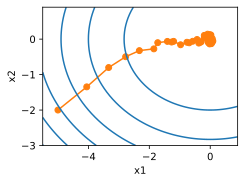

In [6]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))